## 부산 관할구별 5대 범죄(2018~2022) 시각화
### 데이터 로드
> csv 파일을 불러와서 DataFrame 으로 변경
### 데이터 전처리
> 필요 없는 컬럼 제거 후 엑셀파일로 저장
> 2018~2022 데이터들을 통합
### 데이터 시각화

#### 데이터 로드

In [1]:
# 필요 라이브러리 등록
import pandas as pd

In [2]:
busanCrime2022 = pd.read_csv('./data/busan_crime_2022.csv', engine='python', sep=',', encoding='cp949')
busanCrime2021 = pd.read_csv('./data/busan_crime_2021.csv', engine='python', sep=',', encoding='cp949')
busanCrime2020 = pd.read_csv('./data/busan_crime_2020.csv', engine='python', sep=',', encoding='cp949')
busanCrime2019 = pd.read_csv('./data/busan_crime_2019.csv', engine='python', sep=',', encoding='cp949')
busanCrime2018 = pd.read_csv('./data/busan_crime_2018.csv', engine='python', sep=',', encoding='cp949')

busanCrime2022.rename(columns={"경찰서": "관할서", " 성범죄": "성범죄"}, inplace=True)
busanCrime2021.rename(columns={"경찰서": "관할서", " 성범죄": "성범죄"}, inplace=True)
busanCrime2020.rename(columns={"경찰서": "관할서", " 성범죄": "성범죄"}, inplace=True)
busanCrime2019.rename(columns={"경찰서": "관할서", " 성범죄": "성범죄"}, inplace=True)
busanCrime2018.rename(columns={"경찰서": "관할서", " 성범죄": "성범죄"}, inplace=True)

dfCrime2022 = pd.DataFrame(busanCrime2022)
dfCrime2021 = pd.DataFrame(busanCrime2021)
dfCrime2020 = pd.DataFrame(busanCrime2020)
dfCrime2019 = pd.DataFrame(busanCrime2019)
dfCrime2018 = pd.DataFrame(busanCrime2018)

#### 데이터 전처리
> 필요없는 컬럼 제거 하여 엑셀로 다시 저장: 연번, 구분
> 2018~2022 데이터를 통합

In [3]:
dfCrime2018.columns

Index(['연번', '관할서', '구분', '살인', '강도', '성범죄', '절도', '폭력'], dtype='object')

In [4]:
dfCrime2022[['관할서', '살인', '강도', '성범죄', '절도', '폭력']].to_excel('./data/busan_crime_2022.xlsx', index=False)
dfCrime2021[['관할서', '살인', '강도', '성범죄', '절도', '폭력']].to_excel('./data/busan_crime_2021.xlsx', index=False)
dfCrime2020[['관할서', '살인', '강도', '성범죄', '절도', '폭력']].to_excel('./data/busan_crime_2020.xlsx', index=False)
dfCrime2019[['관할서', '살인', '강도', '성범죄', '절도', '폭력']].to_excel('./data/busan_crime_2019.xlsx', index=False)
dfCrime2018[['관할서', '살인', '강도', '성범죄', '절도', '폭력']].to_excel('./data/busan_crime_2018.xlsx', index=False)

In [5]:
dfCrime2022 = pd.read_excel('./data/busan_crime_2022.xlsx')
dfCrime2021 = pd.read_excel('./data/busan_crime_2021.xlsx')
dfCrime2020 = pd.read_excel('./data/busan_crime_2020.xlsx')
dfCrime2019 = pd.read_excel('./data/busan_crime_2019.xlsx')
dfCrime2018 = pd.read_excel('./data/busan_crime_2018.xlsx')

In [6]:
# '관할서' 컬럼을 인덱스로 변경
dfCrime2022 = dfCrime2022.set_index('관할서')
dfCrime2021 = dfCrime2021.set_index('관할서')
dfCrime2020 = dfCrime2020.set_index('관할서')
dfCrime2019 = dfCrime2019.set_index('관할서')
dfCrime2018 = dfCrime2018.set_index('관할서')

In [7]:
# 각 컬럼별 데이터 합
crime_mur = dfCrime2018['살인'] + dfCrime2019['살인'] + dfCrime2020['살인'] + dfCrime2021['살인'] + dfCrime2022['살인']
crime_rob = dfCrime2018['강도'] + dfCrime2019['강도'] + dfCrime2020['강도'] + dfCrime2021['강도'] + dfCrime2022['강도']
crime_sex = dfCrime2018['성범죄'] + dfCrime2019['성범죄'] + dfCrime2020['성범죄'] + dfCrime2021['성범죄'] + dfCrime2022['성범죄']
crime_bur = dfCrime2018['절도'] + dfCrime2019['절도'] + dfCrime2020['절도'] + dfCrime2021['절도'] + dfCrime2022['절도']
crime_vio = dfCrime2018['폭력'] + dfCrime2019['폭력'] + dfCrime2020['폭력'] + dfCrime2021['폭력'] + dfCrime2022['폭력']

In [8]:
# 2018~2022 범죄별 건수 총합을 concat 하여 5개년 5대범죄 DataFrame 생성
dfBusanCrime = pd.concat([crime_mur, crime_rob, crime_sex, crime_bur, crime_vio], ignore_index=True, axis=1)
dfBusanCrime.columns = ['살인', '강도', '성범죄', '절도', '폭력']

In [9]:
dfBusanCrime

,살인,강도,성범죄,절도,폭력
관할서,,,,,
중부,8,12,221,3463,3393
동래,15,16,479,4681,6256
영도,15,9,170,1639,2965
동부,5,18,235,2790,3817
부산진,19,50,1400,11283,14655
서부,8,16,152,2662,2524
남부,30,28,751,6425,9324
해운대,16,24,846,6588,8838
사상,30,26,485,4800,6251


#### 데이터 시각화

In [10]:
# 필요 라이브러리 등록
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [11]:
sns.set_style('darkgrid')

In [12]:
# 한글 깨짐 문제 해결
from matplotlib import rc

rc('font', family='D2Coding')

plt.rcParams['axes.unicode_minus'] = False

In [13]:
# 범죄별 빈도가 다르기 때문에 0~1 범위로 놓고 각 항목의 최댓값은 1 최소값은 0
x = dfBusanCrime[['살인', '강도', '성범죄', '절도', '폭력']].values
scaler = preprocessing.MinMaxScaler()
x_scaler = scaler.fit_transform(x.astype(float))

busanCrimeNor = pd.DataFrame(x_scaler, columns=['살인', '강도', '성범죄', '절도', '폭력'], index=dfBusanCrime.index)
busanCrimeNor

,살인,강도,성범죄,절도,폭력
관할서,,,,,
중부,0.12,0.155556,0.055288,0.189133,0.071941
동래,0.40,0.244444,0.262019,0.315429,0.307870
영도,0.40,0.088889,0.014423,0.000000,0.036671
동부,0.00,0.288889,0.066506,0.119349,0.106881
부산진,0.56,1.000000,1.000000,1.000000,1.000000
서부,0.12,0.244444,0.000000,0.106076,0.000330
남부,1.00,0.511111,0.479968,0.496267,0.560692
해운대,0.44,0.422222,0.556090,0.513169,0.520643
사상,1.00,0.466667,0.266827,0.327769,0.307458


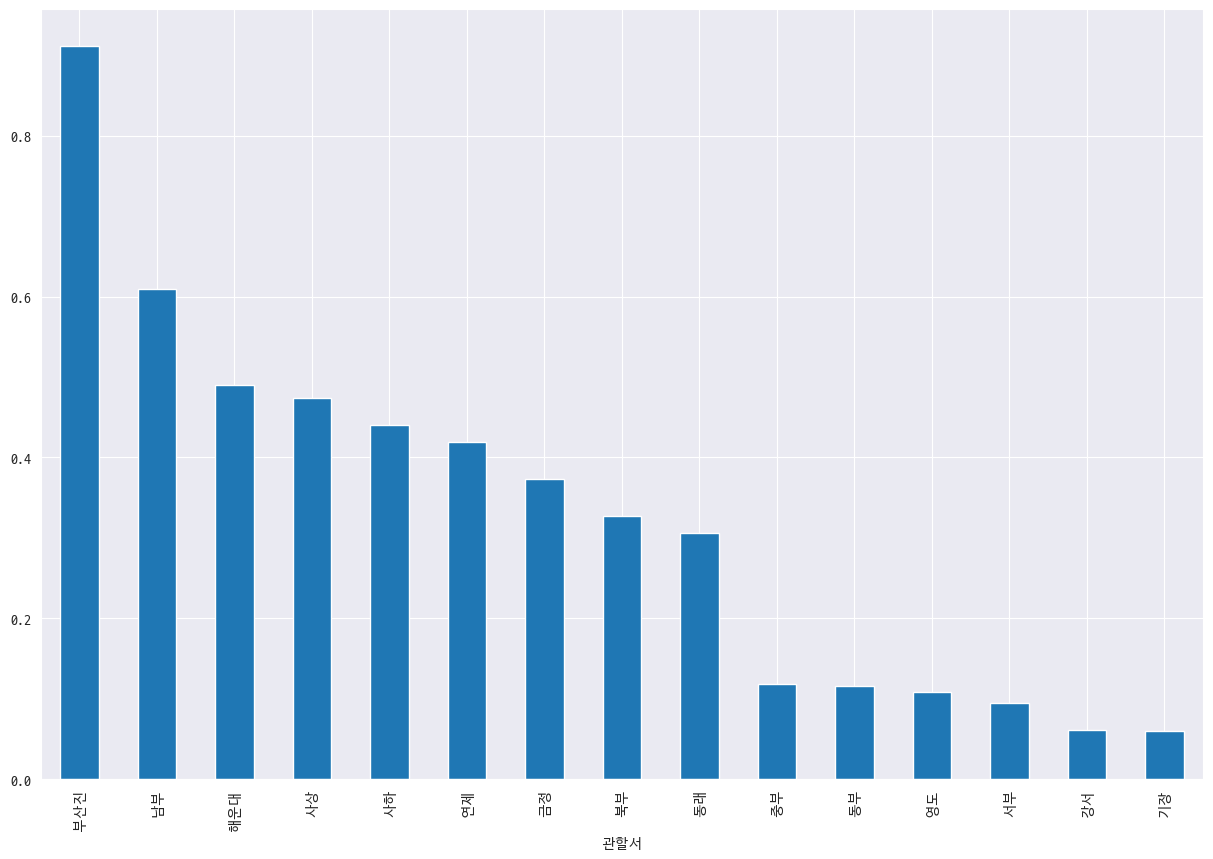

In [14]:
# 막대그래프로 비교
busanCrimeNor['5대범죄'] = np.sum(busanCrimeNor[['살인', '강도', '성범죄', '절도', '폭력']], axis=1) / 5
busanCrimeSort = busanCrimeNor.sort_values('5대범죄', ascending=False)
busanCrimeSort = busanCrimeSort.iloc[:, 5]
busanCrimeSort.plot.bar(figsize=(15, 10))
plt.show()

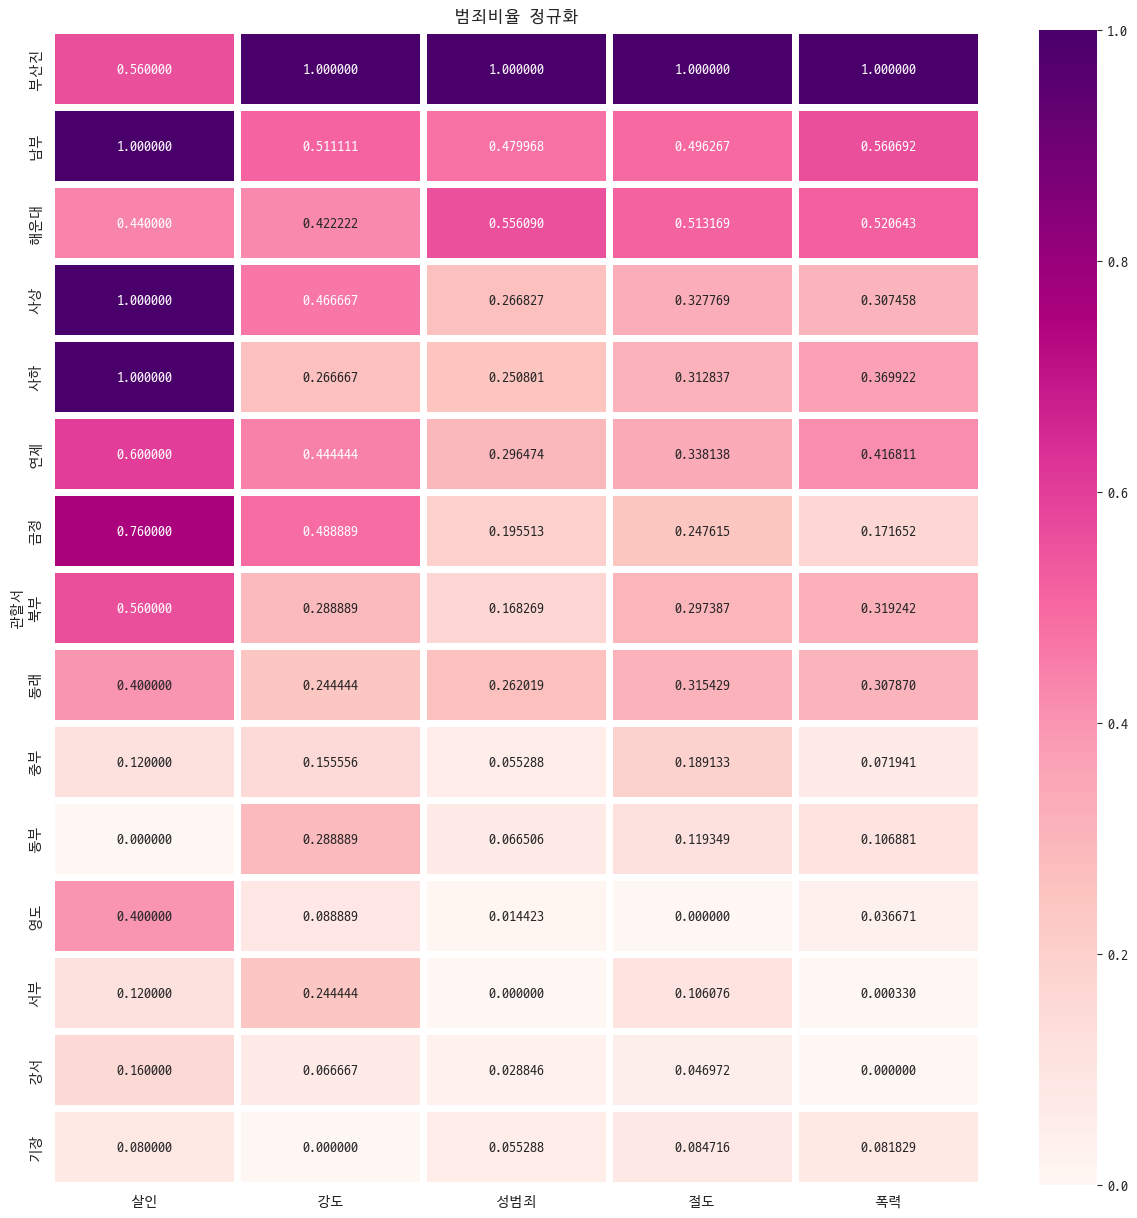

In [15]:
# 히트맵으로 관할서 당 범죄 빈도율
busanCrimeSort = busanCrimeNor.sort_values(by='5대범죄', ascending=False)
plt.figure(figsize=(15, 15))

sns.heatmap(busanCrimeSort[['살인', '강도', '성범죄', '절도', '폭력']], annot=True, fmt='f', linewidths=5, cmap="RdPu")
plt.title('범죄비율 정규화')
plt.show()

In [16]:
# 범죄별 2018~2022 발생건수 추이 

crimeData2018_sum = dfCrime2018.sum()
crimeData2019_sum = dfCrime2019.sum()
crimeData2020_sum = dfCrime2020.sum()
crimeData2021_sum = dfCrime2021.sum()
crimeData2022_sum = dfCrime2022.sum()
crimeData2022_sum

살인        42
강도        36
성범죄     1136
절도     11378
폭력     14338
dtype: int64

In [17]:
# 범죄별 년도당 범죄 수 합을 구해 DataFrame 으로 변환
mur = pd.DataFrame()
mur['year'] = ["2018", "2019", "2020", "2021", "2022"]
mur['발생건수'] = [53, 63, 51, 46, 42]

rob = pd.DataFrame()
rob['year'] = ["2018", "2019", "2020", "2021", "2022"]
rob['발생건수'] = [91, 82, 39, 51, 36]

sex = pd.DataFrame()
sex['year'] = ["2018", "2019", "2020", "2021", "2022"]
sex['발생건수'] = [1533, 1470, 1416, 1338, 1136]

bur = pd.DataFrame()
bur['year'] = ["2018", "2019", "2020", "2021", "2022"]
bur['발생건수'] = [14261, 14491, 14169, 12670, 11378]

vio = pd.DataFrame()
vio['year'] = ["2018", "2019", "2020", "2021", "2022"]
vio['발생건수'] = [19503, 20649, 19056, 16094, 14338]

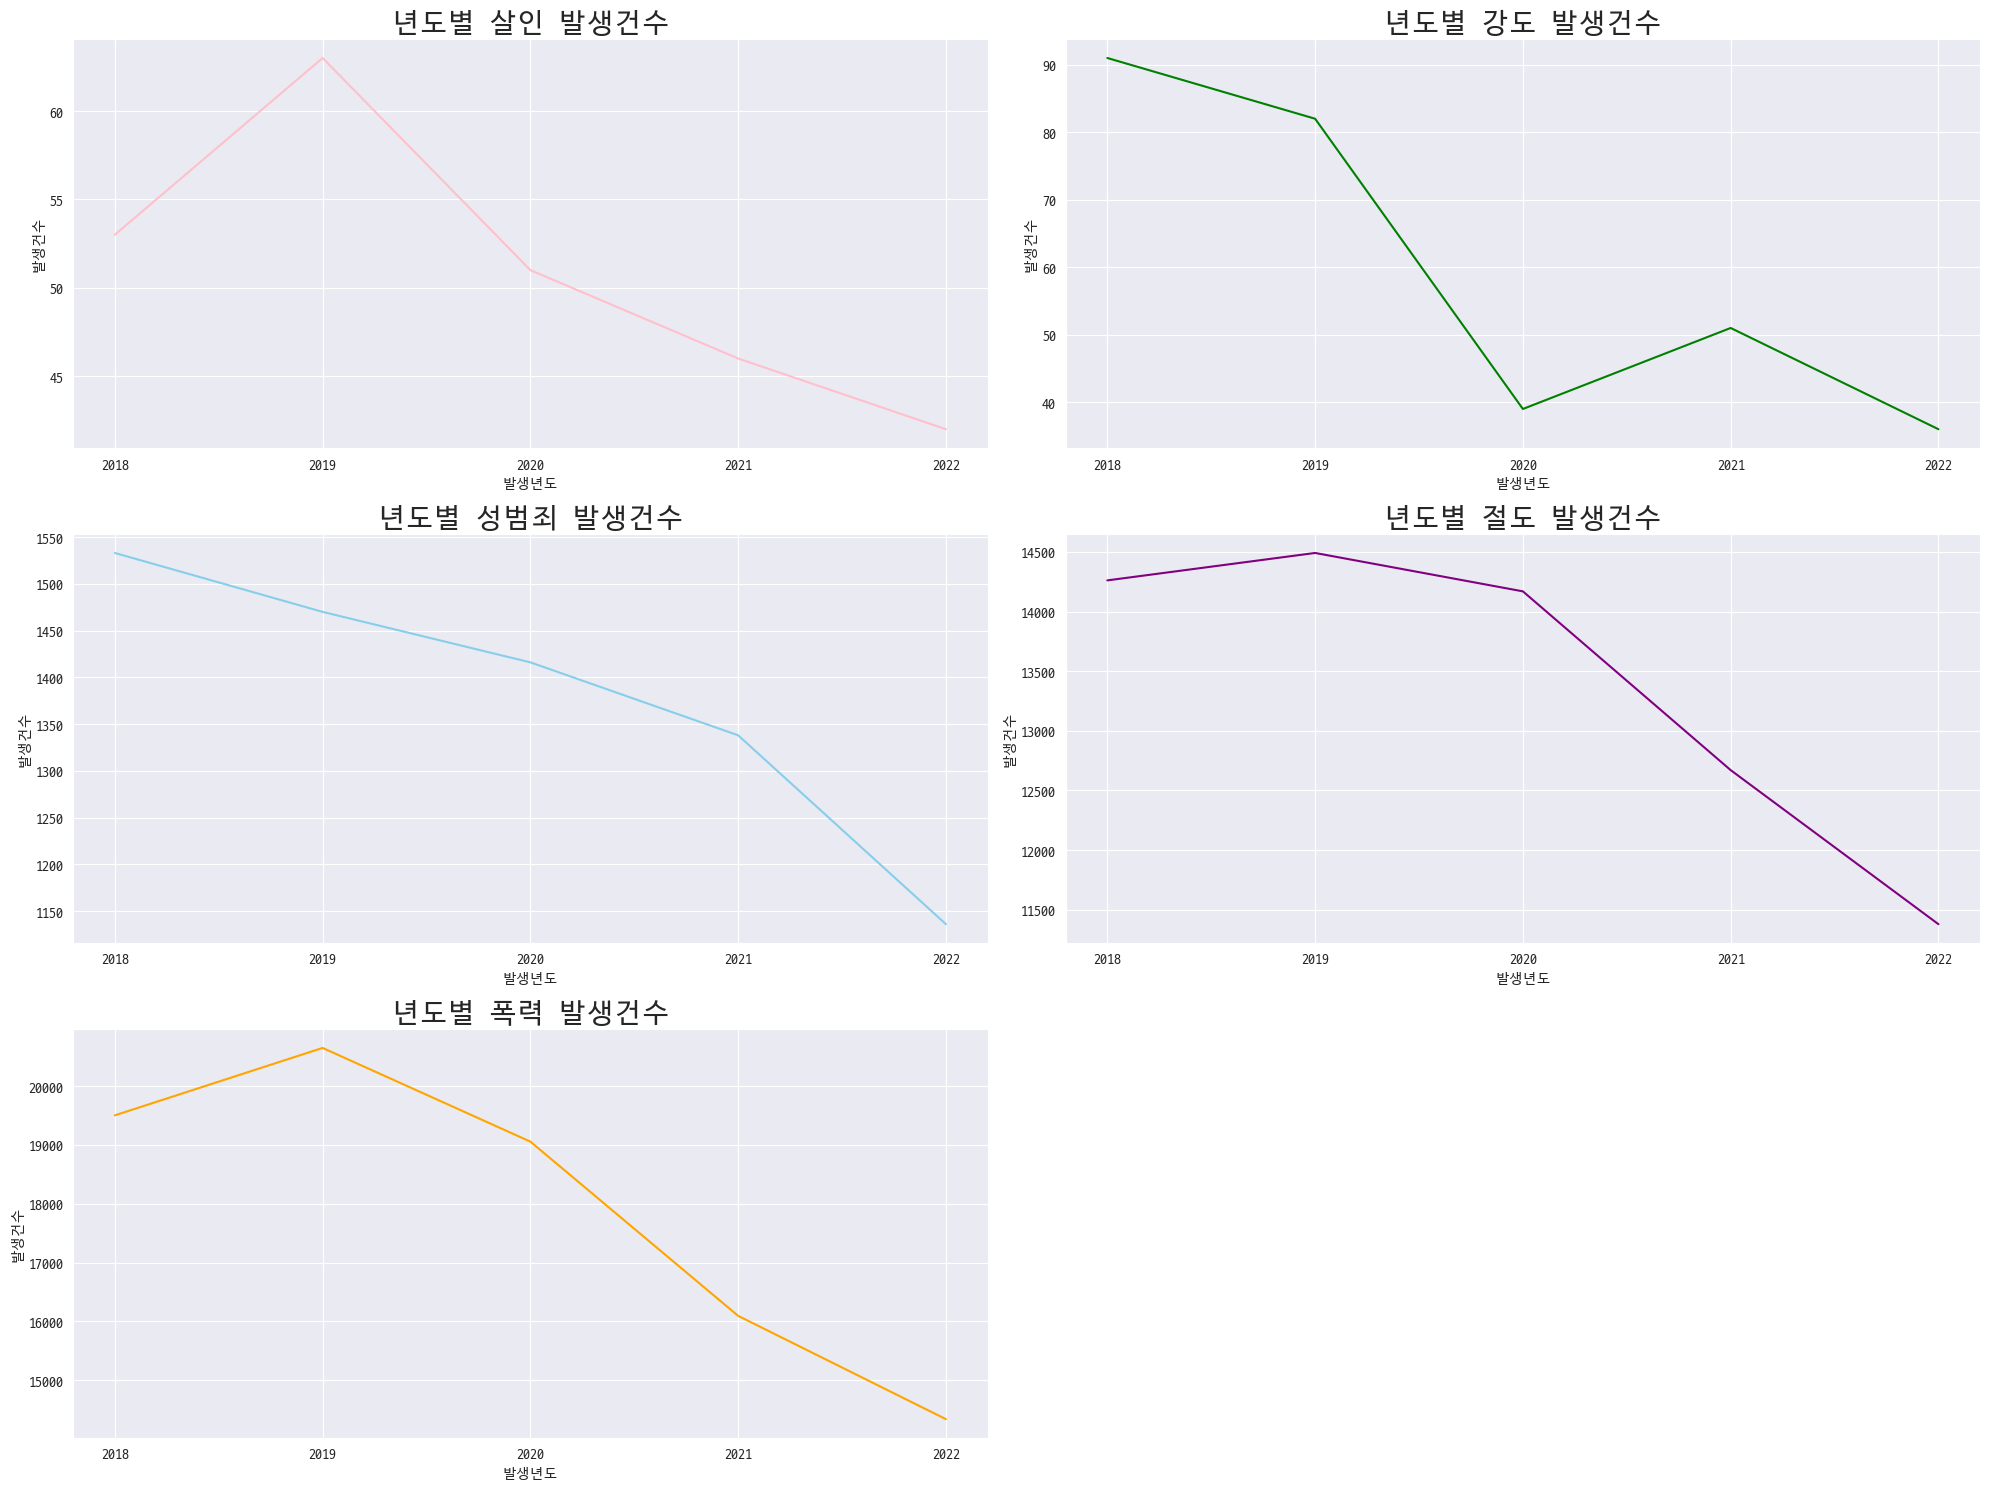

In [18]:
fig = plt.figure(figsize=(20,15))
fig.set_facecolor('white')

plt.subplot(3,2,1)
plt.plot(mur['year'], mur['발생건수'], color='pink')
plt.title('년도별 살인 발생건수', fontsize=20)
plt.xlabel('발생년도')
plt.ylabel('발생건수')

plt.subplot(3,2,2)
plt.plot(rob['year'], rob['발생건수'], color='green')
plt.title('년도별 강도 발생건수', fontsize=20)
plt.xlabel('발생년도')
plt.ylabel('발생건수')

plt.subplot(3,2,3)
plt.plot(sex['year'], sex['발생건수'], color='skyblue')
plt.title('년도별 성범죄 발생건수', fontsize=20)
plt.xlabel('발생년도')
plt.ylabel('발생건수')

plt.subplot(3,2,4)
plt.plot(bur['year'], bur['발생건수'], color='purple')
plt.title('년도별 절도 발생건수', fontsize=20)
plt.xlabel('발생년도')
plt.ylabel('발생건수')

plt.subplot(3,2,5)
plt.plot(vio['year'], vio['발생건수'], color='orange')
plt.title('년도별 폭력 발생건수', fontsize=20)
plt.xlabel('발생년도')
plt.ylabel('발생건수')

plt.tight_layout()
plt.show()

다